# Numerics

In [ ]:
%pip install numpy scikit-learn matplotlib agosto

## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from algosto.solvers import SGDSolver, SAGASolver
from algosto.functions import binary_log_likelihood
from algosto.evaluate import trajectory

In [9]:
np.random.seed(42)
nb_points = 250 # number of data for each class

## Data generation

In [10]:
class_0 = np.random.normal(-2, 2, (nb_points, 2))
class_1 = np.random.normal(2, 2, (nb_points, 2))

X = np.vstack((class_0, class_1))
y = np.repeat(np.array([0, 1]).T, repeats=nb_points)

indices = np.random.permutation(X.shape[0])

X_shuffled = X[indices]
y_shuffled = y[indices]

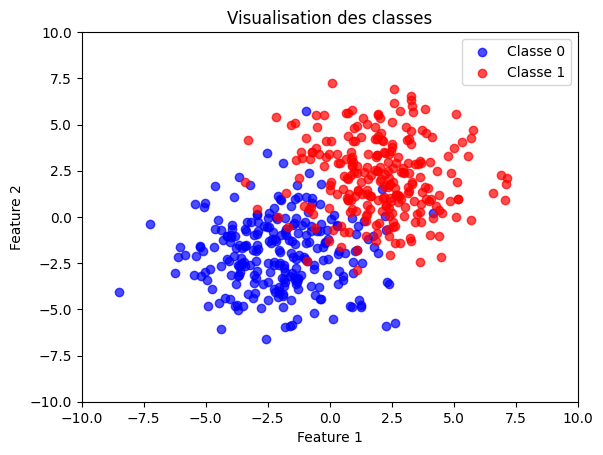

In [11]:
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Classe 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Classe 1', alpha=0.7)

plt.xlim((-10, 10))
plt.ylim((-10, 10))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des classes')
plt.legend()
plt.show()

## Logistic regression

In [12]:
def logistic(X: np.array, weights: np.array):
    def sigmoid(S):
        return 1 / (1 + np.exp(-S))
    return sigmoid(X @ weights.T)

In [13]:
batch_size = 10
n_batch = int(np.ceil(X.shape[0]/batch_size))
BLL_f, BLL_grad = binary_log_likelihood(X, y, batch_size, logistic)

## Gradient Descent

In [20]:
from algosto.solvers import AbstractSolver

In [31]:
class GDSolver(AbstractSolver):
    def __init__(self, d, M, objective, grad, cst=None, random_state=None):
        super().__init__(d, objective, cst, random_state)
        
        self.set_name("GD")
        
        self.grad = grad
        self.M = M
    
    def fit(self, x_start: np.ndarray = None, n_iter: int = 1000):
        super().fit(x_start, n_iter)
        
        x = self.get_x_start()

        for n in range(1, self._n_iter):
            batch_filter = np.ones(self.M)
            x = x - 0.1 * self.grad(x, batch_filter=batch_filter)

            self._save_position(x)

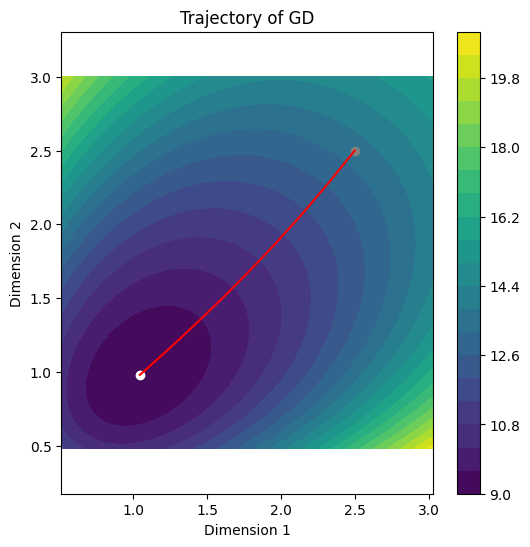

In [32]:
solver = GDSolver(d=2, M=n_batch, objective=BLL_f, grad=BLL_grad, random_state=42)

solver.fit(x_start=np.array([2.5, 2.5]), n_iter=500)

trajectory(solver)

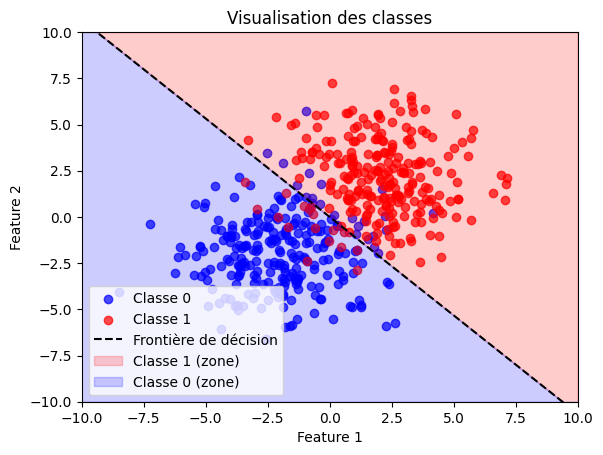

In [33]:
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Classe 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Classe 1', alpha=0.7)

w1, w2 = solver.get_trajectory()[-1]
x_values = np.linspace(-10, 10, 100)  # Points sur l'axe x
decision_boundary = -(w1 / w2) * x_values  # Calcul de y
plt.plot(x_values, decision_boundary, color='black', linestyle='--', label='Frontière de décision')

# Tracer les zones de prédiction
plt.fill_between(
    x_values, decision_boundary, 10, color='red', alpha=0.2, label='Classe 1 (zone)'
)
plt.fill_between(
    x_values, decision_boundary, -10, color='blue', alpha=0.2, label='Classe 0 (zone)'
)

plt.xlim((-10, 10))
plt.ylim((-10, 10))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des classes')
plt.legend()

plt.show()

## Stochastic gradient descent

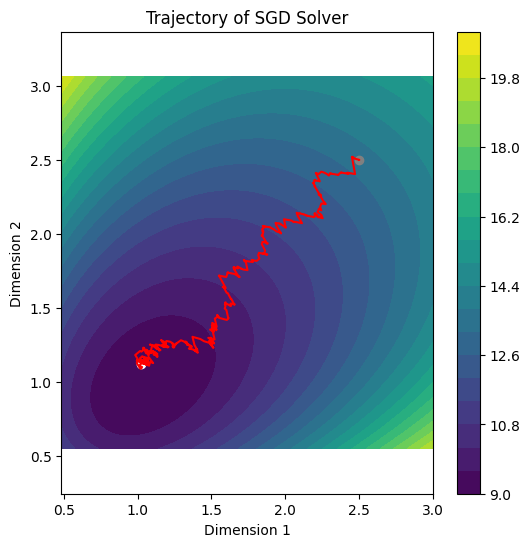

In [14]:
solver = SGDSolver(d=2, M=n_batch, objective=BLL_f, grad=BLL_grad, gamma=0.1, random_state=42)

solver.fit(x_start=np.array([2.5, 2.5]), n_iter=500)

trajectory(solver)

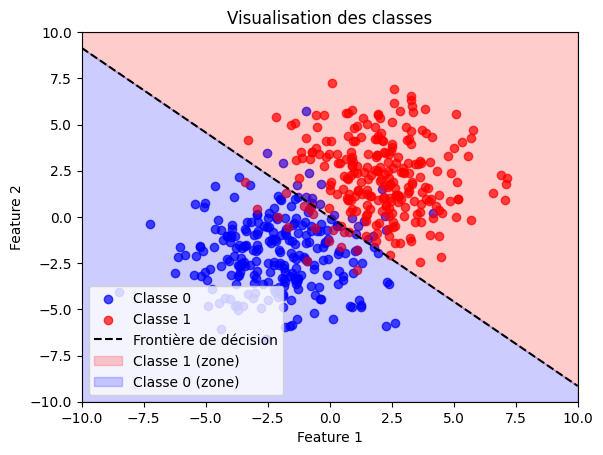

In [15]:
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Classe 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Classe 1', alpha=0.7)

w1, w2 = solver.get_trajectory()[-1]
x_values = np.linspace(-10, 10, 100)  # Points sur l'axe x
decision_boundary = -(w1 / w2) * x_values  # Calcul de y
plt.plot(x_values, decision_boundary, color='black', linestyle='--', label='Frontière de décision')

# Tracer les zones de prédiction
plt.fill_between(
    x_values, decision_boundary, 10, color='red', alpha=0.2, label='Classe 1 (zone)'
)
plt.fill_between(
    x_values, decision_boundary, -10, color='blue', alpha=0.2, label='Classe 0 (zone)'
)

plt.xlim((-10, 10))
plt.ylim((-10, 10))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des classes')
plt.legend()

plt.show()

## SAGA

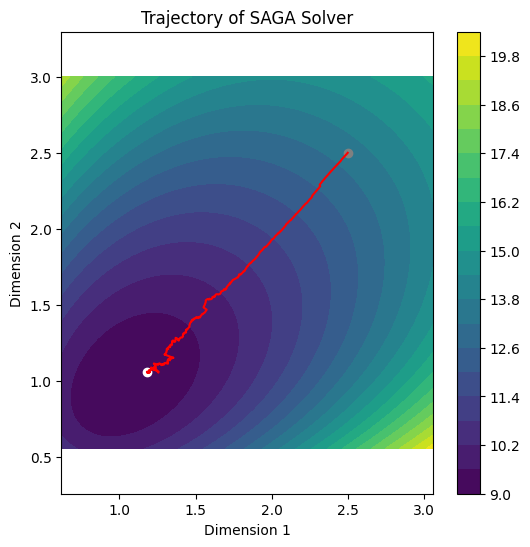

In [16]:
solver = SAGASolver(d=2, M=n_batch, objective=BLL_f, grad=BLL_grad, gamma=0.1, random_state=42, alpha=1)

solver.fit(x_start=np.array([2.5, 2.5]), n_iter=500)

trajectory(solver)

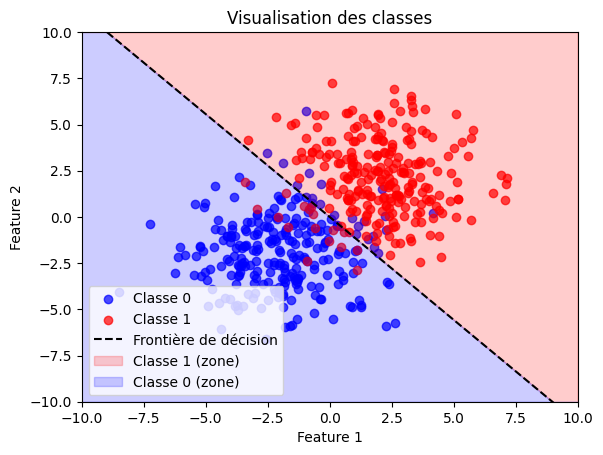

In [17]:
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Classe 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Classe 1', alpha=0.7)

w1, w2 = solver.get_trajectory()[-1]
x_values = np.linspace(-10, 10, 100)  # Points sur l'axe x
decision_boundary = -(w1 / w2) * x_values  # Calcul de y
plt.plot(x_values, decision_boundary, color='black', linestyle='--', label='Frontière de décision')

# Tracer les zones de prédiction
plt.fill_between(
    x_values, decision_boundary, 10, color='red', alpha=0.2, label='Classe 1 (zone)'
)
plt.fill_between(
    x_values, decision_boundary, -10, color='blue', alpha=0.2, label='Classe 0 (zone)'
)

plt.xlim((-10, 10))
plt.ylim((-10, 10))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des classes')
plt.legend()

plt.show()

## $\lambda$-SAGA

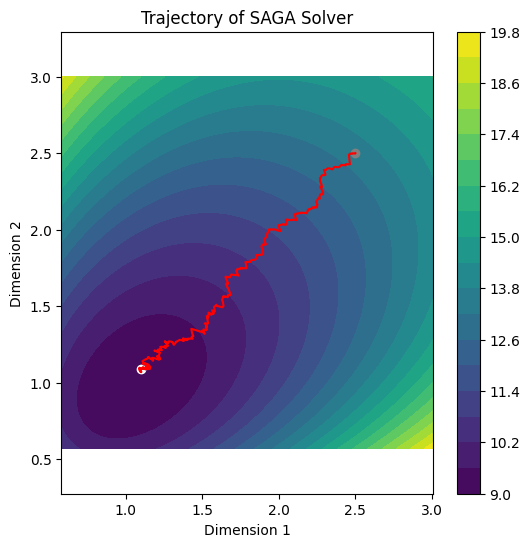

In [18]:
solver = SAGASolver(d=2, M=n_batch, objective=BLL_f, grad=BLL_grad, gamma=0.1, random_state=42, alpha=0.5)

solver.fit(x_start=np.array([2.5, 2.5]), n_iter=500)

trajectory(solver)

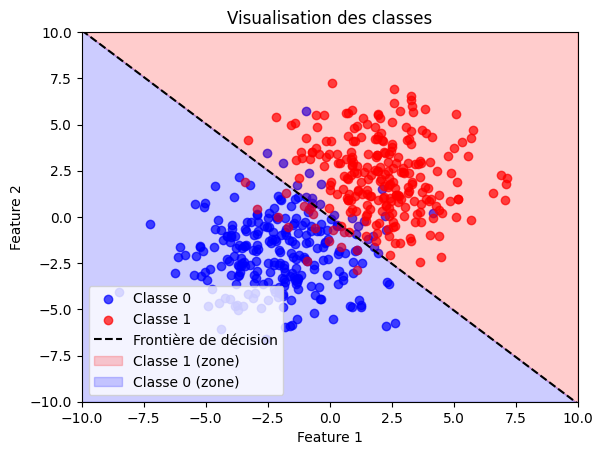

In [19]:
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Classe 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Classe 1', alpha=0.7)

w1, w2 = solver.get_trajectory()[-1]
x_values = np.linspace(-10, 10, 100)  # Points sur l'axe x
decision_boundary = -(w1 / w2) * x_values  # Calcul de y
plt.plot(x_values, decision_boundary, color='black', linestyle='--', label='Frontière de décision')

# Tracer les zones de prédiction
plt.fill_between(
    x_values, decision_boundary, 10, color='red', alpha=0.2, label='Classe 1 (zone)'
)
plt.fill_between(
    x_values, decision_boundary, -10, color='blue', alpha=0.2, label='Classe 0 (zone)'
)

plt.xlim((-10, 10))
plt.ylim((-10, 10))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des classes')
plt.legend()

plt.show()